In [31]:
from typing import Tuple, List, Dict, Any
import numpy as np
import matplotlib.pyplot as plt
# sklearn
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Torch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

# Hands-on Introduction to Deep Learning (Lecture 1)
The **prereqs** are kept (on purpose) to a minimum, i.e.:
- Basic knowledge of <font color="blue"><b>derivatives and the chain rule</b></font>.
- Ability to perform <font color="blue"><b>simple matrix operations</b></font> (dot product, multiplication, transpose).
- Knowledge of <a href="https://www.python.org">Python</a> and <a href="https://www.numpy.org">NumPy</a>.<br>
  CHPC provides courses on these topics. You can find them at:<br>
  + <a href="https://github.com/chpc-uofu/python-lectures">Introduction to Python</a>
  + <a href="https://github.com/chpc-uofu/intro-numpy">Introduction to NumPy & SciPy</a>

# 1.Artificial Intelligence (AI)
<font color="green"><b>Artificial intelligence (AI)</b></font> is the ability of machines to perform tasks that<br>normally <font color="green"><b>require human intelligence</b></font>.
Among these tasks we have, e.g.:
* discern hand-written digits, addresses,...
* facial recognition in order to admit people access to buildings
* write essays
* translate from one language into another one.
* convert audio into transcripts
* self-driving vehicles

Traditionally AI has been performed using <font color="green"><b>different approaches</b></font>:
* <a href="https://pdfs.semanticscholar.org/4fb2/7b22f57442ef8dddfd5eec2e8ef17b901323.pdf">**Rules-Based AI (Expert systems)**</a>:
  - Domain experts extract rules and codify them.
  - Money & time consuming.
  - Rather rigid in order to incorporate new knowledge.
* <a href="https://www.amazon.com/Logic-Based-Artificial-Intelligence-International-Engineering/dp/0792372247">**Logic based AI**</a>: The use of symbolic logic to perform reasoning
* <a href="https://epubs.siam.org/doi/book/10.1137/1.9781611977882">**Machine Learning (ML)**</a>:
  - A data-centric approach
  - Computer systems are able to "learn" from data without explicit instructions
  - Central underpinnings of ML: probability theory, statistics and mathematical optimization.

In the last decade, ML has become the main focus of AI, due to the following reasons:
* The enormous explosion of data creation (Internet, audio, video, audio,..)<br>
  <font color="orangered"><b>Data has become the new currency</b></font>: ML requires huge amounts of data to train its models.
* The increase of parallel computational power:<br>
  - the <font color="green"><b>Graphical Processing Units (GPUs)</b></font> were originally developed for gaming
  - General-purpose GPUs (GPGPUs) emerged for tass beyond visualization such as Scientific Computing and ML.
     
## Types of Machine Learning (ML):
* <font color="green"><b>Supervised Learning:</b></font>
  - <font color="blue"><b>input data and (labeled) output data</b></font> are used for training
  - common techniques: regression, classification
* <font color="green"><b>Unsupervised Learning:</b></font>
  - <font color="blue"><b>input data</b></font> are used for training.
  - high dimensional input data are used and reduced in dimensionality
  - common techniques: clustering, PCA, ..
* <font color="green"><b>Reinforcement Learning:</b></font>
  - concept borrowed from behavorial psychology
  - positive actions are rewarded; negative actions are penalized.

## Current status  
- Currently, an ML model is trained for <font color="green"><b>one specific task</b></font>.
  * it may outperform a human specialist in one particular task (e.g. the interpretation of medical images).
  * but <font color="green"><b>NOT as versatile</b></font> as the human brain/intelligence.
- The versatile AI equivalent of the human mind is <font color="green"><b>AGI (Artificial General Intelligence)</b></font>.

# 2. The concept of a neuron/perceptron
A <font color="green"><b>neuron</b></font> or nerve cell:
- fundamental unit of the nervous system
- fires electrical signals across a <font color="green"><b>neural network</b></font>.
- contains a nucleus and mitochondria
- has additional structure:
  - <font color="green"><b>dendrites</b></font>: receive the incoming electric signal (<font color="green"><b>input</b></font>)
  - <font color="green"><b>axon</b></font>: transmits the electrical signal away from the nerve cell body (<font color="green"><b>output</b></font>)

<img src="neuron.jpg" alt="neuron" width="300">

*Source: <a href="https://www.ninds.nih.gov/health-information/public-education/brain-basics/brain-basics-life-and-death-neuron">*Brain Basics: The Life and Death of a Neuron*</a>

The concept of a physical neuron:
- gave rise to the concept of perceptron (Rosenblatt, 1957)
  
In essence, a <font color="green"><b>perceptron</b></font> is a **non-linear function** $f$ 
(<font color="green"><b>activation function</b></font>)<br>
which receives <font color="green"><b>input</b></font> and returns <font color="green"><b>output</b></font>.

Or a little more formal, $\textbf{y}=f(\textbf{x})$, where:
* $f$: non-linear/activation function
* $\textbf{x} \in \mathbb{R}^{n_1 \times 1}$: input vector i.e. $\textbf{x}:=(x_1,x_2,\ldots, x_{n_1})^T$.
* $\textbf{y} \in \mathbb{R}^{n_2 \times 1}$: output vector i.e. $\textbf{y}:=(y_1,y_2,\ldots, y_{n_2})^T$.

In what follows we will perform 
<font color="green"><b>logistic regression</b></font> (<font color="orangered"><b>the most simple (shallow) neural net possible</b></font>) on a simple data set. <br>This simple toy model/example will allow us:
* to display the <b>(essential) features</b> of deep learning.
* to easily transition to the <b>general case</b>.

# 3.Logistic Regression (as the most simple neural net!)
## 3.1. Goal/Task
* To train a <font color="green"><b>binary classifier</b></font> based on a given training set
  <br>using <font color="green"><b>one neuron</b></font> (<font color="green"><b>one unit</b></font>) in just <font color="green"><b>one layer</b></font>, i.e.
  (**shallow network**)
* To obtain the <font color="green"><b>accuracy</b></font> of the trained model using a test set.
* To <font color="green"><b>predict</b></font> the outcome of some data (provided) using the model.
* To get familiar with some DL net frameworks.

<img src="perceptron.jpeg" width="400">

<font><i>Logistic regression as a (shallow neural network):</i></font><br>
<font><i>the activation function operates on the $n$ inputs to generate $1$ output.</i></font>

## 3.2.Training of the binary classifier
The <font color="green"><b>training</b></font> of a binary classifier (and <font color="orangered"><b>in extenso a deep neural net</b></font>) 
consists of the following steps:
* **Initialize** the <font color="green"><b>parameters</b></font> (<font color="green"><b>weight vector and bias</b></font>)
* Perform an **iterative loop** over the following 2 substeps:

  + <font color="green"><b>Forward propagation</b></font>:<br>
    Given a training set, and a set of <font color="green"><b>parameters</b></font> (weight vector and bias)
    we calculate the associated cost function,<br>
    which is a measure how different the predicted data are from the true data.

  + <font color="green"><b>Back propagation</b></font>:<br>
    Based on the cost function we perform an <font color="green"><b>update</b></font> on the set of<br> parameters (weight vector and bias)
    in order to <font color="green"><b>lower</b></font> the cost.
 

The <font color="green"><b>training set</b></font> consists of $m_{\mathrm{train}}$ data points</b>:<br> $(\mathbf{x}_i,y_i)$, $i \in \{1,\ldots,m_{\mathrm{train}}\}$<br>
  where:
  - $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.<br>
    Each dimension of the vector $\mathbf{x_i}$ represents a <font color="green"><b>feature</b></font> ($\Rightarrow$ n features).
  - $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
    

### 3.2.1. Forward Propagation
* At the perceptron (only $\mathbf{1}$!), each data point $i$ ($i \in \{1,\ldots,m_{\mathrm{train}}\}$) will be<br>
  subjected to the following $2$ transformations:
  1. $\texttt{affine}$ transformation:<br>
       $\begin{eqnarray}
         z_i & = &   \mathbf{w^T}.\mathbf{x_i} +b \;\;,\;\; \mathbf{x_i} \in \mathbb{R}^{n\times 1} \nonumber \\
            &=  &  \displaystyle{\sum_{j=1}^n w_j x_{ji} +b} \nonumber
       \end{eqnarray}$
    
     where:<br>
     - $ \mathbf{w}$ : <font color="green"><b>weight</b></font> vector ($\in \mathbb{R}^{n \times 1}$)<br>
       Note: the weight vector has <font color="orangered"><b>same number of dimensions as there are features</b></font> .
    
     - $ b$ : <font color="green"><b>bias</b></font> (scalar $\Rightarrow \in \mathbb{R}$).

     - For each data point: the <font color="orangered"><b> weight vector and bias used at this one perceptron are the same</b></font>.   
  2. subsequent $\texttt{non linear activation}$:<br>
     $a_i =  \sigma(z_i)$ , $a_i \in \mathbb{R}$<br>
     where:<br>
     - $\sigma$ is known as the <font color="green"><b>sigmoid</b></font> function.
   
     - $\begin{equation}
        \sigma(z) = \displaystyle \frac{1}{1+e^{-z}} 
       \end{equation}$
    
     - The activation of the <b>last layer</b> (in this case we only have one layer) is the same<br>
       as the predicted value ($\widehat{y_i})$. Thus, <br>
    
       $\begin{equation}
       \widehat{y_i} := a_i \nonumber
       \end{equation}$
   
* Calculate the <font color="green"><b>cost function</b></font> ($\mathcal{C}$).<br>
  The cost function $\mathcal{C}$ is defined as the mean of the <font color="green"><b>loss functions</b></font> ($\mathcal{L}^{(i)}$) over the $m_{\mathrm{train}}$ data points:

  $\begin{eqnarray}
       \mathcal{C}       & := & \displaystyle \frac{1}{m_{\mathrm{train}}} \sum_{i=1}^{m_{\mathrm{train}}}        \mathcal{L}^{(i)} 
  \end{eqnarray}$
  

  In case of **binary classification**, the **loss function** $\mathcal{L}^{(i)}$ for data point $i$ is given by:
  
  $\begin{eqnarray}
       \mathcal{L}^{(i)} & = & - \bigg [ y_i \log(\widehat{y_i}) + (1-y_i)\log(1-\widehat{y_i}) \bigg ] \\
                         & = & - \bigg [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \bigg ] \\
  \end{eqnarray}$

* <font color="red"><b>Computational Note:</b></font><br>
  The vectorization feature in NumPy should be exploited.<br>
  Instead of performing the $\texttt{affine transformation}$ and $\texttt{activation}$ on **one** element<br>
  at the time, perform the operation on an $\texttt{ndarray}$ of elements.

  Provided that:
  + $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.
  + $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
  + The $\mathrm{m}$ $\mathbf{x_i}$ column vectors can be collected in the $n \times m$ matrix $X$,<br>
    given by:

    $\begin{eqnarray}
         X & := & \begin{pmatrix}
                                \vdots & \cdots  &\vdots \\
                                 \mathbf{x_1}   & \vdots  & \mathbf{x_{m}}  \\
                                 \vdots & \cdots & \vdots 
                 \end{pmatrix}
     \end{eqnarray}$

      
  + The $\mathrm{m}$ $y_i$ values can be collected in the row vector $Y$,<br>
    given by:

    $\begin{eqnarray}
       Y & := & \begin{pmatrix} y_1 & y_2 & \cdots & y_{\mathrm{m}-1} & y_{\mathrm{m}} 
                 \end{pmatrix}
      \end{eqnarray}$

  + Thus:
    - $\begin{eqnarray}
         \mathbf{Z} & = &   \mathbf{w^T}.\mathbf{X} + \mathbf{b}  \nonumber 
       \end{eqnarray}$

    - $\begin{eqnarray}
          \mathbf{A} & = & \sigma(\mathbf{Z}) \nonumber
      \end{eqnarray}$
 

#### Some notes on the sigmoid function

The sigmoid function $\sigma(z)$ has the following properties:

* $
   \begin{equation}
  \lim_{ z \to -\infty} \sigma(z) = 0
  \end{equation}$

* $\begin{equation}
   \lim_{ z \to +\infty} \sigma(z) = 1
  \end{equation}$

* $\begin{equation}
   \sigma(0) = \frac{1}{2}
  \end{equation}$

* $\begin{equation}
  \displaystyle \frac{d \sigma(z)}{dz} = \sigma(z)(1-\sigma(z))
  \end{equation}$

The range of the sigmoid is $[0,1]$ and thus be interpreted as a <font color="green"><b>probability</b></font>.
  

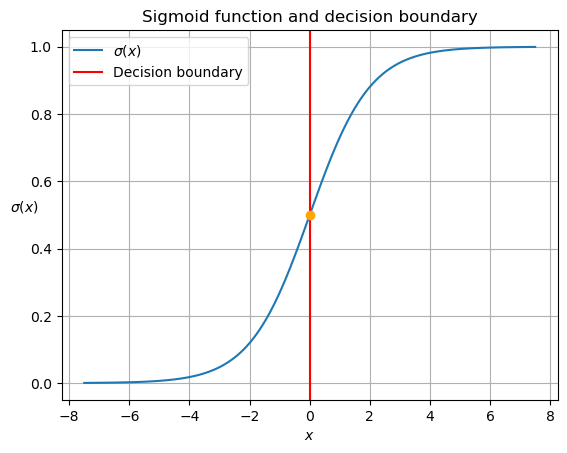

In [30]:
x = np.linspace(-7.5, 7.5, 1501)
y = 1.0/(1.0+np.exp(-x))
plt.title(r"Sigmoid function and decision boundary")
plt.xlabel(r"$x$")
plt.ylabel(r"$\sigma(x)$",rotation=0)
plt.plot(x,y, label =r"$\sigma(x)$" )
plt.axvline(x=0,color='r',ymin=0.0, ymax=1.0, label="Decision boundary")
plt.plot(0.0,0.5,marker='o',color='orange')
plt.legend()
plt.grid()
plt.show()

#### Exercise 1: Tools for the forward propagation
<font color="blue"><b>Implement the following **3** functions:</b></color>


##### **Exercise 1.1**:
`def init_param(n: int) -> Tuple[np.ndarray, float]:`<br>
  * The <font color="green"><b>weight</b></font> vector is a **column vector** having the <font color="red"><b>(n,1)</b></font> shape and of type float.
  * The <font color="green"><b>bias</b></font> is a **scalar** of type float.
  * All elements of the weight vector and bias can be initialized to $0.0$.

In [70]:
# Exercise 1.1:
def init_param(n: int) -> Tuple[np.ndarray, float]:
    """
    Initialize the parameters (weight, bias) for the Binary Classifier.
    
    Args:
        n (int): The number of features.
    
    Returns:
        Tuple[np.ndarray, float]: A tuple containing the initialized weight (column vector)
                                 & the initialized bias (scalar).
    """
    # Here comes YOUR code to initialize the weight vector & bias.
    # W =  <--- Weight (vector) to zero
    # b =  <--- bias (float) to zero
    W = np.zeros((n,1), dtype=float)  # <---- ADDED by WRC!
    b = 0.0                           # <---- ADDED by WRC! 
    return W,b

##### <font color="blue"><b>Simple check of the function:</b></font>

In [17]:
# %load tests/lec1/test_ex1.1.py

In [12]:
# Solution::
# %load solutions/lec1/sol_ex1.1.py

##### **Exercise 1.2**
`def sigmoid(Z: np.ndarray) -> np.ndarray:`<br>
  * Perform $\sigma(\mathbf{Z})$ element-wise 

In [7]:
# Exercise 1.2:
def sigmoid(Z: np.ndarray) -> np.ndarray:
    """
    Compute the sigmoid function.
    
    Args:
        Z (np.ndarray): The input value(s).
    
    Returns:
        np.ndarray: The sigmoid of the input value(s).
    """
    # Here comes YOUR code for the sigmoid function.
    # return <---  
    return 1.0 / (1.0 + np.exp(-Z))  # <---- ADDED by WRC!

##### <font color="blue"><b>Simple check of the function:</b></font>

In [24]:
# %load tests/lec1/test_ex1.2.py

In [18]:
# Solution (in case of need)::
# %load solutions/lec1/sol_ex1.2.py

##### **Exercise 1.3**
`def forward(X: np.ndarray,Y:np.ndarray,`<br>
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`W: np.ndarray, b: float) ->`<br> 
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Tuple[np.ndarray, float]:`<br>
 *  $ \mathbf{Z} = \mathbf{w^T}.\mathbf{X} + \mathbf{b} $
 *  $ \mathbf{A} = \sigma(\mathbf{Z})$  ($\texttt{Ex 1.2.}$)
 *  $ \mathcal{C} = - \frac{1}{m} \displaystyle \sum_{i=1}^m \bigg [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \bigg ]$ <br>
    The latter equation can be easily vectorized in NumPy using $\mathbf{A}$ and $\mathbf{Y}$.

In [27]:
# Exercise 1.3:
def forward(X: np.ndarray, Y: np.ndarray,
            W: np.ndarray, b: float) -> Tuple[np.ndarray, float]:
    """
    Perform the forward pass of the binary classifier.
    
    Args:
        X (np.ndarray): The training data (features)  -> shape(n, m) 
                        where n is #features & m is #samples.
        Y (np.ndarray): The training labels (targets) -> shape(1, m)
                        where m is #samples.
        W (np.ndarray): The weight vector             -> shape(n,1 ).
        b (float)     : The bias term                 -> float
    
    Returns:
        Tuple[np.ndarray, float]: 
          A tuple containing the activation matrix and the cost.
    """
    # Here comes YOUR code for the forward propagation.
    num_samples = X.shape[1]
    # Z =   <-- Your code
    # A =   <-- Your code
    # cost =  <-- Your code
    Z = np.dot(W.T, X) + b                                                    # <----- WRC
    A = sigmoid(Z)                                                            # <----- WRC
    cost = -np.sum(Y * np.log(A) + (1.0 - Y) * np.log(1.0 - A)) /num_samples  # <----- WRC
    return A, cost

##### <font color="blue"><b>Simple check of the function:</b></font>

In [32]:
# %load tests/lec1/test_ex1.3.py

In [ ]:
# Solution (in case of need)::
# %load solutions/lec1/sol_ex1.3.py

### 3.2.2. Back Propagation
Our ultimate goal (during the training phase of our model) is to find the <font color="green"><b>optimal values</b></font><br> for the weight vector ($\widehat{w}$), and the bias ($\widehat{b}$).<br>
  Thus:<br>

  $\begin{equation}
     \widehat{w}, \widehat{b} = \underset{w,b}{\operatorname{argmin}} \mathcal{C}
  \end{equation}$

This goal can be reached iteratively:
1. by calculating the <font color="green"><b>direction/gradient</b></font> w.r.t weights and bias which leads to a minimum of the cost function $\mathcal{C}$).
2. by subsequently <font color="green"><b>updating</b></font> the values of the weight vector and the bias along the aforementioned direction.

1.Calculate the **gradient of cost function** w.r.t the weights and the bias:
  
  + $\begin{eqnarray}
      \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} & = & \frac{\partial}{\partial a_i} \bigg [ - \big [ y_i \log(a_i) + (1-y_i)\log(1-a_i) \big ] \bigg ]\\
                                                      & = & -\frac{y_i}{a_i} + \frac{(1-y_i)}{(1-a_i)}
    \end{eqnarray}$
 
    
  + $\begin{eqnarray}
        \frac{\partial \mathcal{L}^{(i)}}{\partial z_i} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i} \\
         & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial \sigma(z_i)}{\partial z_i} \\
         & =& a_i - y_i
    \end{eqnarray}$
 
    
  + $\begin{eqnarray}
       \frac{\partial \mathcal{L}^{(i)}}{\partial b} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i}\frac{\partial z_i}{\partial b} \\
                 & = & a_i - y_i
    \end{eqnarray}$
  + $\begin{eqnarray}
      \frac{\partial \mathcal{L}^{(i)}}{\partial w_j} & = & \frac{\partial \mathcal{L}^{(i)}}{\partial a_i} \frac{\partial a_i}{\partial z_i}\frac{\partial z_i}{\partial w_j} \\
                 & = & (a_i - y_i) x_{ji}
    \end{eqnarray}$
    
  Thus, <br>

  + $\begin{eqnarray}
     \frac{\partial\mathcal{C}}{\partial b}  & =   &= & \frac{1}{m_{\mathrm{train}}}\displaystyle \sum_{i=1}^{m_{\mathrm{train}}} \frac{\partial \mathcal{L}^{(i)}}{\partial b}  
                                             & = & \frac{1}{m_{\mathrm{train}}} \displaystyle \sum_{i=1}^{m_{\mathrm{train}}} (a_i - y_i) 
     \end{eqnarray}$

  + $\begin{eqnarray}
     \frac{\partial\mathcal{C}}{\partial w_j}  &= & \frac{1}{m_{\mathrm{train}}}\displaystyle \sum_{i=1}^{m_{\mathrm{train}}} \frac{\partial \mathcal{L}^{(i)}}{\partial b} 
      & = & \frac{1}{m_{\mathrm{train}}} \displaystyle \sum_{i=1}^{m_{\mathrm{train}}} (a_i - y_i) x_{ji} \;\;,\;\;\forall \, j \in \{1,\ldots,n\}
     \end{eqnarray}$

2.**Update** the parameters (using <a href="https://en.wikipedia.org/wiki/Gradient_descent">gradient descent</a>): 

  $\begin{eqnarray}
      b & = & b - \alpha  \frac{\partial\mathcal{C}}{\partial b} \\
      w_j & = & w_j - \alpha  \frac{\partial\mathcal{C}}{\partial w_j} \;\;,\;\;\forall \, j \in \{1,\ldots,n\}
    \end{eqnarray}$

  where $\alpha$ is known as the <font color="green"><b>learning rate </b></font> or the <font color="green"><b>step size</b></font> (gradient descent).  

<font color="red"><b>Computational Note:</b></font><br>
  The vectorization feature in NumPy should be exploited.  

#### Exercise 2: Tools for the Back propagation
<font color="blue"><b>Implement the following functions:</b></font>

##### **Exercise 2.1**
`def calcgrad(X_train:np.ndarray, Y_train:np.ndarray, A:np.ndarray) ->\`<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Tuple[np.ndarray, float]:`

These are the steps:  
* $\mathbf{dZ} = \mathbf{A} - \mathbf{Y}$
* $\mathbf{dW} = \frac{1}{m} \mathbf{X}.\mathbf{dZ}^T$
* $db = \frac{1}{m} \displaystyle \sum_{i=1}^m \mathbf{dZ}_i$
* return $\mathbf{dW},db$

In [33]:
# Exercise 2.1.:
def calcgrad(X: np.ndarray, Y: np.ndarray, 
             A:np.ndarray) ->  Tuple[np.ndarray, float]:
    """        
    Computes the gradients of the cost function with respect to W and b.
    Arg:
        X (np.ndarray): Training data -> shape(n,m)
        Y (np.ndarray): Training labels -> shape(1,m)
        A (np.ndarray): Activation matrix -> shape(1,m) 
    Return:
        A tuple containing the gradients with respect to W and b.
    """ 
    # Here comes the calcgrad code
    num_samples = X.shape[1]
    # dZ = <---
    # dW = <---
    # db = <---
    dZ = A -Y                          # <---- WRC
    dW = np.dot(X, dZ.T)/num_samples   # <---- WRC
    db = np.sum(dZ) / num_samples      # <---- WRC
    return dW,db

##### <font color="blue"><b>Simple check of the function:</b></font>

In [42]:
# %load tests/lec1/test_ex2.1.py

In [ ]:
# Solution (in case of need)::
# %load solutions/lec1/sol_ex2.1.py

##### **Exercise 2.2**
`def update(Weights: np.ndarray, bias: float,\`<br>
   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`dWeight: np.ndarray, dbias:float, lr:float) -> Tuple[np.ndarray, float]:`<br>
Here are the steps:
* $\mathbf{W} = \mathbf{W} - \alpha \,\mathbf{dW}$
* $b = b - \alpha \,db$
* return $\mathbf{W},b$

In [51]:
# Exercise 2.2.:
def update(Weights: np.ndarray, bias: float,
           dWeight: np.ndarray, dbias:float,
           lr:float) -> Tuple[np.ndarray, float]:
    """
    Update the parameters using the gradients and learning rate.    

    Args:
        Weights (np.ndarray): The weight vector             -> shape(n, 1).
        bias (float)        : The bias term                 -> float
        dWeight (np.ndarray): The gradient of the cost w.r.t. W -> shape(n, 1).
        dbias (float)       : The gradient of the cost w.r.t. b -> float
        lr (float)          : The learning rate.    

    Returns:
        Tuple[np.ndarray, float]: 
          A tuple containing the updated weight and bias.
    """
    # Here comes the code to update the weight vector and the bias.
    # Weights = <---
    # bias = <---
    Weights -= lr* dWeight  # <---- WRC
    bias -= lr*dbias           # <---- WRC
    return Weights, bias

##### <font color="blue"><b>Simple check of the function:</b></font>

In [53]:
# %load tests/lec1/test_ex2.2.py

In [55]:
# Solution (in case of need)::
# %load solutions/lec1/sol_ex2.2.py

#### Exercise 3: Training (complete)
<font color="blue"><b>Implement the following function:</b></font>

`def train_model(X: nd.array, Y: nd.array, \`<br>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`num_epochs: int, lr: float) -> Tuple[List[float],np.ndarray, float]:`
Here are steps:
* initialize $\mathbf{W},b$ to 0.0  
* perform a loop/iteration:
  - Calculate $\mathbf{A}, \mathcal{C}$ (cost) using the forward function
  - Calculate the gradients $\mathbf{dW}, db$
  - Update $\mathbf{W}, b$ using the gradients $\mathbf{dW}, db$
* return lst(cost), $\mathbf{W},b$. 

In [22]:
# Exercise 3.1.
def train_model(X: np.ndarray, Y: np.ndarray,
                num_epochs: int, lr: float) -> Tuple[List[float],np.ndarray, float]:
    """
    Train the binary classifier using gradient descent.
    
    Args:
        X (np.ndarray): The training data (features)  -> shape(n, m) 
                        where n is #features & m is #samples.
        Y (np.ndarray): The training labels (targets) -> shape(1, m)
                        where m is #samples.
        num_epochs (int): The number of epochs to train.
        lr (float)    : The learning rate.    
    
    Returns:
        Tuple[np.ndarray, float]: 
          A tuple containing the final weight and bias after training.
    """
    # Here comes YOUR code to train the model.
    lstCost = []
    # W,b =         <--- Initialize to 0.0 using previous function
    for i in range(num_epochs):
        # A, cost = <--- Use the forward function
        lstCost.append(cost)
        # dW, db =  <--- Calc. the gradient
        # W, b = <-- Perform the update
    return lstCost, W, b    

In [56]:
# Solution (in case of need)::
# %load solutions/lec1/sol_ex3.1.py

## 4. Testing of the binary classifier 
Once our neural net has been trained, i.e. the <font color="green"><b>optimal values</b></font><br> 
for the parameters $\mathbf{w}$ and $b$ (i.e. $\mathbf{\widehat{w}}$ and $\widehat{b}$) are known. <br> 
We can now test our neural net model using the <font color="green"><b>test data set</b></font>.

* Apply the <font color="green"><b> predict </b></font> function the **test data set**.<br>
  The **predict** function has $2$ components:
  + Apply the **forward** propagation to the test data set but use $\mathbf{\widehat{w}}$ and $\widehat{b}$.
  + Map the obtained activation to either $0$ or $1$
* Calculate the number of correct predictions vs. total predictions. 

### 4.1.Prediction function
* The <font color="green"><b>test set</b></font> consists of $m_{\mathrm{test}}$ test data points</b>:<br> $(\mathbf{x}_i,y_i)$, $i \in \{1,\ldots,m_{\mathrm{test}}\}$<br>
  where:
  - $\mathbf{x_i}$ is a column vector of length of $n$, i.e. $\mathbf{x_i} \in \mathbb{R}^{n \times 1}$.
  - $y_i$ is either 0 ($\texttt{False}$) or 1 ($\texttt{True}$), i.e. $y_i \in \mathbb{R}$.
  - The $m_{\mathrm{test}}$ $\mathbf{x_i}$ column vectors can be collected in the matrix $X$,<br>
    given by:

    $\begin{eqnarray}
         X & := & \begin{pmatrix}
                                \vdots & \cdots  &\vdots \\
                                 \mathbf{x_1}   & \vdots  & \mathbf{x_{\mathrm{m_{test}}}}  \\
                                 \vdots & \cdots & \vdots 
                 \end{pmatrix}
     \end{eqnarray}$
  - The $m_{\mathrm{test}}$ $y_i$ values can be collected in the $2D$ row vector $Y$,<br>
    given by:

    $\begin{eqnarray}
         Y & := & \begin{pmatrix} y_1 & y_2 & \cdots & y_{\mathrm{m_{test}-1}} & y_{\mathrm{m_{test}}} 
                 \end{pmatrix}
     \end{eqnarray}$  
    
* Apply <font color="green"><b>forward propagation</b></font> in (matrix) form (efficiency reasons):
  - $\begin{eqnarray}
        \mathbf{z^T} & = & \mathbf{\widehat{w}^T}. \mathbf{X} + \mathbf{\widehat{b}^T} 
     \end{eqnarray}$
     where:
     + $\mathbf{z^T}$ is a row vector of length $m_{\mathrm{test}}$
     + $\mathbf{\widehat{w}^T}$ is a row vector (containing $n$ el.) with the optimal weights (obtained from the training)
     + $\mathbf{X}$ is $n \times m_{\mathrm{test}}$ matrix.
     + $\mathbf{\widehat{b}^T}$ is a row vector of length $m_{\mathrm{test}}$ (each element is $\widehat{b}$).
  - $\begin{eqnarray}
        \mathbf{a} & = & \sigma(\mathbf{{z}}) 
     \end{eqnarray}$
    where $\sigma$ operates element-wise on the row-vector $\mathbf{z}$<br>
    to generate the row vector $\mathbf{a}$.
* The elements that are calculated ($\widehat{\mathbf{y}}:=\mathbf{a}$) are in the interval $[0,1]$.<br>
  - In order to compare them with the <font color="green"><b>test labels</b></font>, we must <font color="green"><b>map</b></font> the elements of $\mathbf{a}$ into $\{0,1\}$.
  - $\widetilde{y_i} = F(\widehat{\mathbf{y_i}})$ where
    $F(\widehat{\mathbf{y_i}})$ is defined in the following way:<br>
     $\begin{equation}
      \widetilde{y_i}= 
\begin{cases}
    1,& \text{if } a_i \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
     \end{equation}$

#### Exercise 4: prediction function + accuracy
<font color="blue"><b>Implement the following functions:</b></font>

##### **Exercise 4.1:**
`def predict_labels(X: np.ndarray, Weights: np.ndarray,`<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`bias:float) -> np.ndarray:`<br>
Steps:
* Calculate $\mathbf{A}$ using $\mathbf{W}$ and $b$ (obtained from training)
* Map all the elements of A to either $1$ or $0$.

In [60]:
# Exercise 4.1:
def predict_labels(X: np.ndarray, W: np.ndarray, b: float) -> np.ndarray:
    """
    Make predictions using the trained model.
    
    Args:
        X (np.ndarray): The input data (features)  -> shape(n, m) 
                        where n is #features & m is #samples.
        W (np.ndarray): The weight vector             -> shape(n, 1).
        b (float)     : The bias term                 -> float
    
    Returns:
        np.ndarray: The predicted labels (0 or 1).
    """
    # Here comes the code to predict the labels (either 0 or 1
    # A = <----- 
    A = sigmoid(np.dot(W.T, X) + b)  # <------ WRC
    return np.where(A >= 0.5, 1, 0)

##### <font color="blue"><b>Simple check of the function:</b></font>

In [62]:
# %load tests/lec1/test_ex4.1.py

In [63]:
# Solution (in case of need)::
# %load solutions/lec1/sol_ex4.1.py

##### **Exercise 4.2:**
`def accuracy(Y_true: np.ndarray,`<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Y_pred: np.ndarray) -> float<br>
Step:
* return ratio (number matches/total number) * 100. 

In [65]:
# Exercise 4.2:
def accuracy(Y_true: np.ndarray, Y_pred: np.ndarray) -> float:
    """
    Calculate the accuracy of the predictions.
    
    Args:
        Y_true (np.ndarray): The true labels.
        Y_pred (np.ndarray): The predicted labels.
    
    Returns:
        float: The accuracy as a percentage.
    """
    # return <--- Here comes the ratio * 100
    return np.mean(Y_true == Y_pred) * 100     # <---- WRC

##### <font color="blue"><b>Simple check of the function:</b></font>

In [68]:
# %load tests/lec1/test_ex4.2.py

In [69]:
# Solution (in case of need)::
# %load solutions/lec1/sol_ex4.2.py

## 5. Putting it all together

### 5.1.Data Generation
* The python library <a href="https://scikit-learn.org/stable/">scikit-learn</a> (based on NumPy & SciPy) is used to generate a synthetic data set.
* In order to facilitate the visualization we will only choose 2 features.

In [5]:
# Code to generate a data set
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
print(f"  X.shape:{X.shape}")
print(f"  y.shape:{y.shape}")

  X.shape:(500, 2)
  y.shape:(500,)


### 5.2.Splitting the data.
The data set will be split (using scikit-learn) into:
- <font color="green"><b>training set</b></font> 
- <font color="green"><b>test set</b></font>

<font color="orangered"><b>Note:</b></font>
* Normally, we will also create a <font color="green"><b>dev/validation</b></font> set.
* We only $1$ have one <font color="green"><b>hyperparameter</b></font>, i.e. $\alpha$ (learning rate)
* The cost function ($\mathcal{C}$) is <font color="green"><b>convex</b></font>.<br>
  So, our validation set is in essence the test set.

In [6]:
# Code to split the data in training and a test set.
test_ratio = 0.30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, random_state=42)
print(f"Splitting the data set ...")
print(f"  Test ratio:{test_ratio}")
print(f"  Training Data Set:")
print(f"    X_train.shape :: {X_train.shape}")
print(f"    y_train.shape :: {y_train.shape}")
print(f"  Test Data Set:")
print(f"    X_test.shape  :: {X_test.shape}")
print(f"    y_test.shape  :: {y_test.shape}")

Splitting the data set ...
  Test ratio:0.3
  Training Data Set:
    X_train.shape :: (350, 2)
    y_train.shape :: (350,)
  Test Data Set:
    X_test.shape  :: (150, 2)
    y_test.shape  :: (150,)


### 5.3. Visualization of the training data

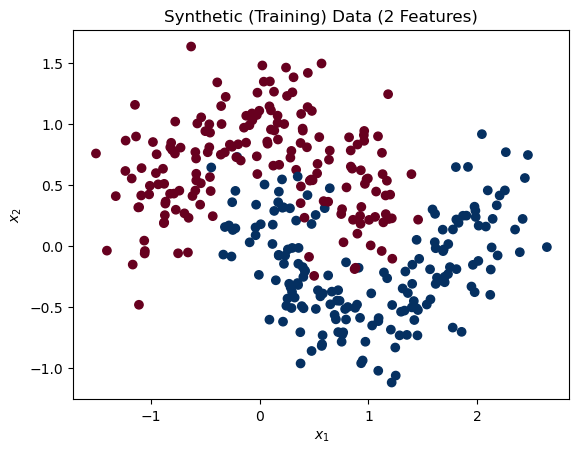

In [9]:
# Visualization of the training set
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu')  
plt.title("Synthetic (Training) Data (2 Features)")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

### 5.4. Train the model

In [10]:
### Exercise
# Here comes your code to train the model
import binclas as bc
lstCost, W,b = bc.train_model(X=X_train.T, Y=y_train[np.newaxis,:], num_epochs=20000, lr=0.05)

In [11]:
#print(f"  lstCost:{lstCost}")
for item in lstCost[-10:]:
    print(f"  cost:{item}")
print(f"  Weight:\n{W}")
print(f"  bias:{b}")

# Predict Labels
y_pred = bc.predict_labels(X_train.T, W,b)
acc = bc.accuracy(y_pred, y_train)
print(f"  Accuracy:{acc:.4f}")

  cost:0.3015517284285147
  cost:0.3015517284285014
  cost:0.3015517284284882
  cost:0.30155172842847494
  cost:0.3015517284284618
  cost:0.3015517284284486
  cost:0.3015517284284353
  cost:0.30155172842842215
  cost:0.301551728428409
  cost:0.30155172842839584
  Weight:
[[ 1.25117692]
 [-4.27468136]]
  bias:0.4082005122594471
  Accuracy:84.2857


#### Comparison with LogisticRegression (from sklearn)

In [37]:
# Training the model using different versions of sckit-learn
# High-accuracy without L2 (term) 
model1 = LogisticRegression(penalty=None, max_iter=100000, tol=1.E-10).fit(X_train,y_train)
print(f"  LogisticRegression (sklearn) without L2 (Training Set) ::")
print(f"    coef:{model1.coef_}")
print(f"    intercept:{model1.intercept_}")
print(f"    score:{model1.score(X_train,y_train):8.4f}")

model2 = LogisticRegression(max_iter=100000, tol=1.E-10).fit(X_train,y_train)
print(f"  LogisticRegression (sklearn) (Training Set) ::")
print(f"    coef:{model2.coef_}")
print(f"    intercept:{model2.intercept_}")
print(f"    score:{model2.score(X_train,y_train):8.4f}")

  LogisticRegression (sklearn) without L2 (Training Set) ::
    coef:[[ 1.25117879 -4.27472833]]
    intercept:[0.40821305]
    score:  0.8429
  LogisticRegression (sklearn) (Training Set) ::
    coef:[[ 1.17659618 -3.52086773]]
    intercept:[0.25533315]
    score:  0.8486


### 5.5.Plot the training data and the dividing line
The point where the divides takes place is $\sigma(z) = \frac{1}{2}$.<br>
Thus:
\begin{eqnarray}
  \sigma(z)     = & \frac{1}{2} \nonumber \\
  \Rightarrow \frac{1}{1+e^{-z}} = & \frac{1}{2} \\
  \Rightarrow  1+ e^{-z} =  &2 \nonumber \\
  \Rightarrow  z  = & 0 \nonumber \\
  \Rightarrow x_2  = & \frac{(-\widehat{w_1} x_1 + \widehat{b})}{\widehat{w_2}} 
\end{eqnarray}

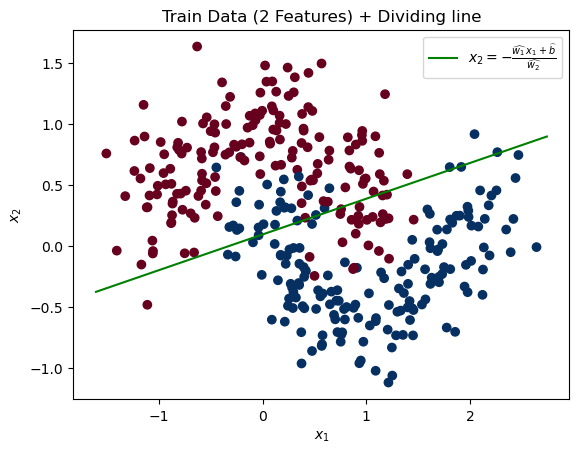

In [23]:
# Visualization of the training set + dividing line
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu')  
plt.title("Train Data (2 Features) + Dividing line")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
(x1_min, x1_max) = np.min(X_train[:,0]), np.max(X_train[:,0])
delta = 0.1
x1 = np.linspace(x1_min-delta,x1_max+delta,501)
x2 = -(W[0]*x1 + b)/W[1]
plt.plot(x1, x2,'g', label=r"$x_2 = - \frac{\widehat{w_1}\,x_1+\widehat{b}}{\widehat{w_2}}$")
plt.legend()
plt.show()

### 5.6.Test the model

In [46]:
# Here comes your code to test the model
# Predict Labels
y_pred = bc.predict_labels(X_test.T, W,b)
acc = bc.accuracy(y_pred, y_test)
print(f"  Accuracy:{acc:.4f}")

  Accuracy:86.0000


#### Comparison with LogisticRegression (from sklearn)

In [7]:
print(f"  LogisticRegression (sklearn) without L2 (Test Data Set) ::")
print(f"    score:{model1.score(X_test,y_test):8.4f}")
print(f"  LogisticRegression (sklearn) (Test Set) ::")
print(f"    score:{model2.score(X_test,y_test):8.4f}")

  LogisticRegression (sklearn) without L2 (Test Data Set) ::
    score:  0.8600
  LogisticRegression (sklearn) (Test Set) ::
    score:  0.8533


## 6. Conclusion
Congratulations!<br>
* You have implemented the simplest neural net from scratch.
* You have learned that the training of a neural net is (in general) an iterative process 
  consisting of:
  + forward propagation
  + backward propagation
* Once the training has been done, you can test your neural net.
* You can apply your model on new data (from the same distribution)

This algorithm is the basic algorithm for **all** neural networks.

## 7.Perform the same task using PyTorch
Our goal is to perform Logistic Regression using PyTorch.<br>
In general, there are several recurring topics:
* A. <font color="green"><b>Load</b></font> data
* B. Define the Deep Neural Net (DNN) <font color="green"><b>model/architecture</b></font>
* C. Define the <font color="green"><b>Loss/Objective</b></font> function
* D. Define the <font color="green"><b>Optimization</b></font> algorithm
* E. Assemble the components \{A,B,C,D\}
     + Training
     + Saving/load the model to & from disk
     + Testing

### A.Loading the data
* We have 2 PyTorch data classes (to be discussed later):
  + data.Dataset : to load/create data in a class<br>
    requires: \_\_init\_\_(), \_\_len\_\_(), \_\_getitem\_\_()
  + data.DataLoader:: to load data in batches
* For the time being (conversion to PyTorch Tensor)

In [101]:
# Generate the PyTorch Tensors from the NumPy Data
# Note: default torch.float32
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1,1)  # 2D 
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1,1)    # 2D

In [102]:
# Check Conversion from NumPy to PyTorch Tensor
START, END= 0, 2
print(f"NumPy data::")
print(f"  X_train: {X_train.shape}\n{X_train[START:END]}")
print(f"  y_train: {y_train.shape}\n{y_train[START:END]}")
print(f"\nPyTorch data::")
print(f"  X_train_tensor: {X_train_tensor.shape}\n{X_train_tensor[START:END]}")
print(f"  y_train_tensor: {y_train_tensor.shape}\n{y_train_tensor[START:END]}")

NumPy data::
  X_train: (350, 2)
[[ 1.3002999  -0.53762795]
 [-0.8817249   0.18799726]]
  y_train: (350,)
[1 0]

PyTorch data::
  X_train_tensor: torch.Size([350, 2])
tensor([[ 1.3003, -0.5376],
        [-0.8817,  0.1880]])
  y_train_tensor: torch.Size([350, 1])
tensor([[1.],
        [0.]])


### B.The Deep Neural Net (DNN) Model

In [103]:
# Define the logistic Regression module using PyTorch
class LogisticRegressionModel(nn.Module):

    def __init__(self, num_inputs):

        # The class inherits from the class nn.Module
        super(LogisticRegressionModel,self).__init__()

        # Define a Single LAYER object which connects 
        #     the input with 1 single output 
        self.linear = nn.Linear(num_inputs, 1)

        # Create the ACTIVATION (object) for the Single Layer
        self.act_fn = nn.Sigmoid()

    def forward(self, x):

        # Applies the forward propagation
        z = self.linear(x)
        a = self.act_fn(z)
        return a

In [104]:
model = LogisticRegressionModel(num_inputs=2)
print(f"  Logistic Model:{model}")

  Logistic Model:LogisticRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (act_fn): Sigmoid()
)


In [106]:
# In PyTorch, you can use either the parameters() function
# or the names_parameters() function
for name, param in model.named_parameters():
    print(f"Name:{name:20s} -> param:{param.shape}")
    print(f"{param.data}\n")  

Name:linear.weight        -> param:torch.Size([1, 2])
tensor([[0.3450, 0.6416]])

Name:linear.bias          -> param:torch.Size([1])
tensor([0.5703])



### C.Loss/Objective function
* In order to find the <font color="green"><b>optimal parameters</b></font> for the weights and bias, we need
  to have an <font color="green"><b>objective function</b></font> (a.k.a Loss function)
* There are several options:
  + <a href="https://docs.pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#bceloss"><b>nn.BCELoss()</b></a>: Binary Cross entropy => inputs need to be $[0,1]$
  + <a href="https://docs.pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.BCEWithLogitsLoss"><b>nn.BCEWithLogitLoss()</b></a>: Numerically more stable because of the combination of sigmoid and loss function at once.

In [119]:
# Creates an instance of the Binary Cross Entropy Criterion
loss_fn = nn.BCELoss()

### D.Optimization
* There are several methods to <font color="green"><b>optimize</b></font> the Loss function/Objective function.<br>
  - In this example we will use the <a href="https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html#sgd"><b>Stochastic Gradient Descent (SGD)</b></a> method<br>
    (<a href="https://docs.pytorch.org/docs/stable/optim.html"><b>torch.optim module</b></a>).
  - Later on, we will describe more powerful <font color="green"><b>optimization algorithms</b></font> (Adam, ...).
* Useful methods:
  + step(): method update parameters
  + zero_grad() : sets the gradients of ALL optimized parameters to zero.

In [162]:
optim = optim.SGD(model.parameters(), lr=0.005)

### E.Assembling the components \{A,B,C,D\}

#### 1.Training
* Goal: Obtain the optimized parameters i.e. <font color="green"><b>weight matrix</b></font> and <font color="green"><b>bias</b></font>
* If the data set is **small**, then we will use **all** the training data at **once**.
* Terminology:
  - **One** complete iteration over **all** training data: <font color="green"><b>epoch</b></font>
  - For **larger** training data sets, each <font color="green"><b>epoch</b></font> is split into <font color="green"><b>batches</b></font>.<br>
    * The gradient and the parameters are <font color="blue"><b>updated</b></font> after every batch (points are selected <font color="blue"><b>randomly</b></font>):<br>
      <font color="green"><b>stochastic gradient descent (SGD)</b></font>
    * The batch size is a <font color="green"><b>hyperparameter</b></font>. 

In [130]:
def train_model(X_train_tensor, y_train_tensor, model, loss_fn, optim, num_epochs=100000 , delta_print=10000):
    """"
    Function which trains the model
    """
    
    # Set model to train mode
    # Strictly not necessary for our case 
    model.train()

    # Loop over the epochs
    for epoch in range(num_epochs):

        # PART A: FORWARD PROPAGATION ( => )
        # Step 1: Generate the output (activation of the linear layer)
        output = model(X_train_tensor)

        # Step 2: Use the activation of the last layer & the labels
        #         to calculate the loss.
        loss = loss_fn(output, y_train_tensor)

        # Step B: BACK PROPAGATION ( <= )
        # Step 3: Calculate the gradients of the parameters
        optim.zero_grad()   # Init. the gradients to ZERO!!
        loss.backward()     # Calc. grad. of param.

        # Step 4: Adjust the parameters 
        optim.step()

        if (epoch+1)%delta_print == 0 or epoch==0:
           print(f"  Epoch {epoch+1}/{num_epochs}  Loss:{loss.item():.6f}")
                
    return loss.item()       

In [128]:
# Train the model
final_loss = train_model(X_train_tensor, y_train_tensor, model, loss_fn, optim)
print(f"Loss in the last step:{final_loss:.6f}")

  Epoch 1/100000  Loss:0.301552
  Epoch 5000/100000  Loss:0.301552
  Epoch 10000/100000  Loss:0.301552
  Epoch 15000/100000  Loss:0.301552
  Epoch 20000/100000  Loss:0.301552
  Epoch 25000/100000  Loss:0.301552
  Epoch 30000/100000  Loss:0.301552
  Epoch 35000/100000  Loss:0.301552
  Epoch 40000/100000  Loss:0.301552
  Epoch 45000/100000  Loss:0.301552
  Epoch 50000/100000  Loss:0.301552
  Epoch 55000/100000  Loss:0.301552
  Epoch 60000/100000  Loss:0.301552
  Epoch 65000/100000  Loss:0.301552
  Epoch 70000/100000  Loss:0.301552
  Epoch 75000/100000  Loss:0.301552
  Epoch 80000/100000  Loss:0.301552
  Epoch 85000/100000  Loss:0.301552
  Epoch 90000/100000  Loss:0.301552
  Epoch 95000/100000  Loss:0.301552
  Epoch 100000/100000  Loss:0.301552


In [132]:
# HOW TO Check the final parameters
#   Method 1:
print(f"METHOD 1::")
print(f"Weights::\n{model.linear.weight}\n")
print(f"Bias   ::\n{model.linear.bias}")

print(f"\nMETHOD 2::")
for name, param in model.state_dict().items():
    print(f"{name} -> {param.shape}")
    print(f"  {param.data}")

METHOD 1::
Weights::
Parameter containing:
tensor([[ 1.2509, -4.2704]], requires_grad=True)

Bias   ::
Parameter containing:
tensor([0.4072], requires_grad=True)

METHOD 2::
linear.weight -> torch.Size([1, 2])
  tensor([[ 1.2509, -4.2704]])
linear.bias -> torch.Size([1])
  tensor([0.4072])


In [ ]:
# 

#### 2.Save/load the model to & from disk
* To <font color="green"><b>save</b></font> an object to disk, use <a href="https://docs.pytorch.org/docs/stable/generated/torch.save.html#torch-save"><b>torch.save()</b></a>
* To <font color="green"><b>load</b></font> an object from disk, use <a href="https://docs.pytorch.org/docs/stable/generated/torch.load.html#torch-load"><b>torch.load()</b></a>

In [ ]:
filename='linreg.pth'
torch.save(model,filename)
newmodel = torch.load(filename)

#### 3.Obtain predictions

In [157]:
def test_model(X_tensor, y_tensor, model):

    model.eval()
    with torch.no_grad():
        res_tensor = model(X_tensor)
        ypred_tensor =(res_tensor>0.5).float()
    return ypred_tensor    

def get_accuracy(y_pred, y):
    num_ok = float((y_pred == y).sum())
    return (num_ok / y_pred.shape[0]) * 100.0

In [160]:
y_trainpred_tensor = test_model(X_train_tensor, y_train_tensor, model)
acc_train = get_accuracy(y_trainpred_tensor, y_train_tensor)
print(f"Accuracy train:{acc_train:8.4f}")

y_testpred_tensor = test_model(X_test_tensor, y_test_tensor, model)
acc_test = get_accuracy(y_testpred_tensor, y_test_tensor)
print(f"Accuracy test:{acc_test:8.4f}")

Accuracy train: 84.2857
Accuracy test: 86.0000


## 8.Alternative implementation using PyTorch